# Decision Tree - Example

*Documented by: Nguyen Hoang Dung & Ly Hung Duy (Group 2 - CC01 - Sem 211 - CO3029)*

## 1. Sample dataset

Problem: A university wants to know what are the main factors that help students pass the examination, then makes appropriate school regulations from the final results. They take a sample from a class with below attributes:
- **Male**: 1 if the student are male, 0 otherwise.
- **Attend 12/15 classes**: 1 if the student attends 12 classes or more, 0 otherwise.
- **IQ**: The student's intelligent quotient.
- **SS hours/week**: The amount of time that the student spends at home for studying the subject.
- **Pass**: Target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample.csv')
df

,Male,Attend 12/15 classes,IQ,SS hours/week,Pass
0,1,1,101,1.0,1
1,1,1,91,0.5,1
2,0,1,99,1.0,0
3,0,1,124,2.0,1
4,1,0,109,3.0,1
5,0,0,101,0.5,0
6,1,0,115,2.5,0
7,0,1,136,2.0,1
8,0,0,95,1.0,0


In [3]:
df['SS hours/week'].median()

1.0

## 2. Entropy

Entropy measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples.

Entropy is calculated as below:

$$\text{Info}(D) = - \sum_i p_i log_2 (p_i) $$

where:
- $D$: data partition.
- $p_i$: the probability that an arbitrary tuple in D belongs to class i.

*Notes:* In the textbook [1], it is stated that entropy is the expected information needed to classify a tuple in D. In information theory, entropy measures the amount of information in a random variable, i.e., the labels of tuples in D. It is normally measured in bits (hence the log to the base 2), but using any other base yields only a linear scaling of results.

For example, suppose you are reporting the result of rolling a fair 8-sided dice. Luckily, after 8 times rolling you get all 8 sides. Then the entropy is:

$$ \text{Info}(D) = - \sum_{i=1}^8 log_2\left(\frac{1}{8}\right) = - 8 \times \frac{1}{8} \times log_2\left(\frac{1}{8}\right) = 3 \text{(bits)} $$

This result is what we would expect. If we wish to send the result of rolling an eight-sided die, the most efficient way is to simply encode the result as a 3 digit binary message:

1 - 001, 2 - 010, 3 - 011, 4 - 100, 5 - 101, 6 - 110, 7 - 111, 8 - 000

Therefore, any notations and explanation about entropy is fine. Because they all define the meaning of uncertainty (or chaos, which is impurity) in entropy.

*Example of entropy in sample dataset:*

In the example dataset, we have 5 students passed the exam and 4 do not. Therefore,

- $p_0 = 4/9$
- $p_1 = 5/9$

=> $\text{Info}(D) = - p_0 log_2(p_0) - p_1 log_2(p_1) = - \frac{4}{9}log_2\left(\frac{4}{9}\right) - \frac{5}{9}log_2\left(\frac{5}{9}\right) =  0.991$

## 3. Information gain

Information gain is considered in ID3, which is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

$$ \text{Info}_A(D) = \sum_{j=1}^{v} \frac{|D_j|}{|D|} \text{Info}(D_j) $$
$$ \text{Gain}(A) = \text{Info}(D) - \text{Info}_A(D) $$

We will choose the attribute A that *maximizes* information gain as the splitting attribute.

For example, we select **Attend 12/15 classes** as the splitting attribute. We will split D into 2 smaller partition, $D_0$ will represents the partition where **Attend 12/15 classes** is False, $D_1$ will represents the partition where **Attend 12/15 classes** is True.

In [4]:
df[df['Attend 12/15 classes'] == 0]

,Male,Attend 12/15 classes,IQ,SS hours/week,Pass
4,1,0,109,3.0,1
5,0,0,101,0.5,0
6,1,0,115,2.5,0
8,0,0,95,1.0,0


The size of $D_0$ is $|D_0| = 4$

$\text{Info}(D_0) = - \frac{1}{4}log_2\left(\frac{1}{4}\right) - \frac{3}{4}log_2\left(\frac{3}{4}\right) = 0.811$

In [5]:
df[df['Attend 12/15 classes'] == 1]

,Male,Attend 12/15 classes,IQ,SS hours/week,Pass
0,1,1,101,1.0,1
1,1,1,91,0.5,1
2,0,1,99,1.0,0
3,0,1,124,2.0,1
7,0,1,136,2.0,1


The size of $D_1$ is $|D_1| = 5$

$\text{Info}(D_1) = - \frac{1}{5}log_2\left(\frac{1}{5}\right) - \frac{4}{5}log_2\left(\frac{4}{5}\right) = 0.722$

Then:

$\text{Info}_\text{Attend 12/15 classes}(D) = 0.811 \times \frac{4}{9} + 0.722 \times \frac{5}{9} = 0.762 $

$\text{Gain}(\text{Attend 12/15 classes}) = 0.991 - 0.762 = 0.229 $

You can do by your own to calculate $\text{Gain}(A)$ with other splitting attributes.

## 4. Visualizing Decision Tree using Information Gain

In `sklearn`, we define a `DecisionTreeClassifier` instance with `criterion=entropy` to use Information Gain as the attribute selection measure. We can declare other arguments such as `max_depth` to limit the depth of the generated tree.

Full documentation on `DecisionTreeClassifier` in `sklearn` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [6]:
X = df.drop('Pass', axis='columns')
y = df[['Pass']]

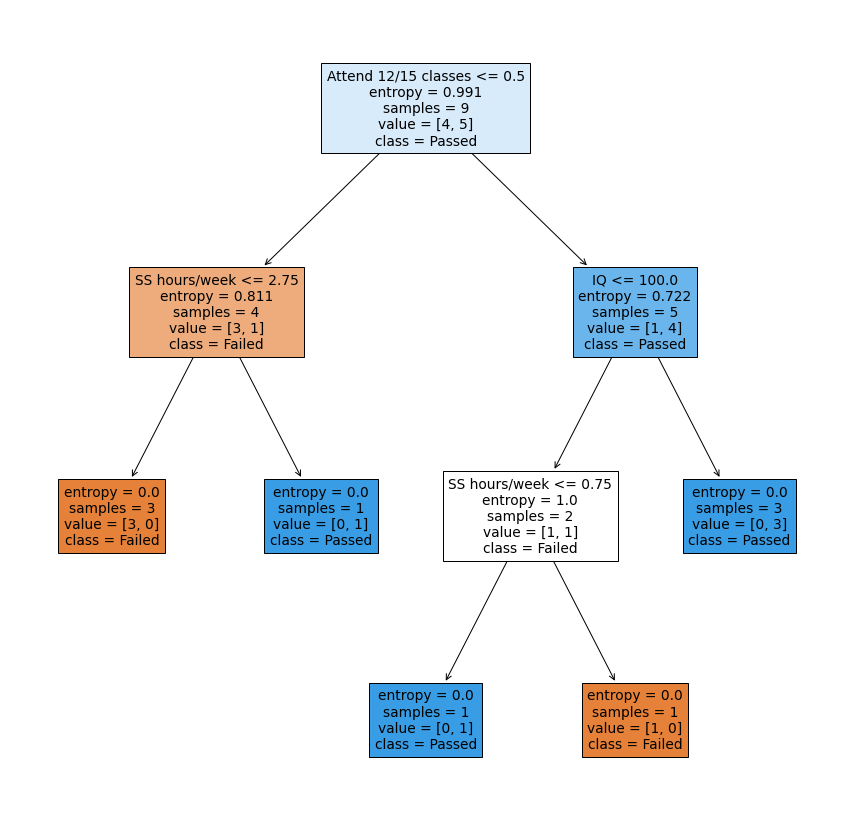

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(criterion='entropy')
model = dtc.fit(X, y)
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model,
                   feature_names=df.columns,
                   class_names=['Failed', 'Passed'],
                   filled=True)

In [8]:
# Trying to predict if a female student who attends all classes, 
# has IQ = 104 and study at home 2.5 hours a day can pass the final examination.
student_1 = np.array([[0, 1, 104, 2.5]])
result_st_1 = model.predict(student_1)
result_st_1

array([1], dtype=int64)

## 5. Gain Ratio

Gain Ratio is used in C4.5. It applies a kind of normalization to information gain using a “split information” value defined analogously with Info(D) as

$$ \text{SplitInfo}_A(D) = - \sum_{j=1}^v \frac{|D_j|}{|D|} \times log_2 \left(\frac{|D_j|}{|D|} \right) $$

Then the ratio is calculated as

$$ \text{GainRatio}(A) = \frac{\text{Gain}(A)}{\text{SplitInfo}_A(D)} $$

In previous example, we have calculated that $\text{Gain}(\text{Attend 12/15 classes}) = 0.229 $, now we add a split information value 

$ \text{SplitInfo}_{\text{Attend 12/15 classes}}(D) = - \left( \frac{4}{9} log_2\left(\frac{4}{9}\right) + \frac{5}{9} log_2\left(\frac{5}{9}\right) \right) = 0.991 $

Then $ \text{GainRatio}(A) = \frac{0.229}{0.991} = 0.231$.

Applying Gain Ratio is not much affect the result in this example, so we don't go deep into Python implementation. You may want to look at the text book and search Google for the case that Gain Ratio gives major improvement comparing to Information Gain.

## 6. Gini Impurity

The Gini index is used in CART, where:

$$ \text{Gini}(D) = 1 - \sum_{i=1}^{m} p_i^2 $$

Similar to *Information Gain*, we also calculate the *reduction in impurity* as the Gini index before split and after split:

$$ \text{Gini}_A(D) = \sum_{j=1}^{v} \frac{|D_j|}{|D|} \text{Gini}(D_j) $$

For example, consider a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

$$ \text{Gini}_A(D) = \frac{|D_1|}{|D|} \text{Gini}(D_1) + \frac{|D_2|}{|D|} \text{Gini}(D_2) $$

The reduction in impurity that would be incurred by a binary split on attribute A is

$$ \Delta \text{Gini}(A) = \text{Gini}(D) - \text{Gini}_A(D)$$

The attribute that maximizes the reduction in impurity (or, equivalently, has the minimum Gini index) is selected as the splitting attribute.

Doing the same example like the last section, with **Attend 12/15 classes** as the splitting attribute, we will get:

- $ \text{Gini}(D) = 1 - \left(\frac{4}{9}\right)^2 - \left(\frac{5}{9}\right)^2 = 0.494 $
- $ \text{Gini}(D_0) = 1 - \left(\frac{3}{4}\right)^2 - \left(\frac{1}{4}\right)^2 = 0.375 $
- $ \text{Gini}(D_1) = 1 - \left(\frac{1}{5}\right)^2 - \left(\frac{4}{5}\right)^2 = 0.32 $
- $ \text{Gini}_\text{Attend 12/15 classes}(D) = \frac{4}{9} \times 0.375 + \frac{5}{9} \times 0.32 = 0.344 $

- $ \Delta \text{Gini}(\text{Attend 12/15 classes}) = \text{Gini}(D) - \text{Gini}_A(D) = 0.494 - 0.344 = 0.15 $

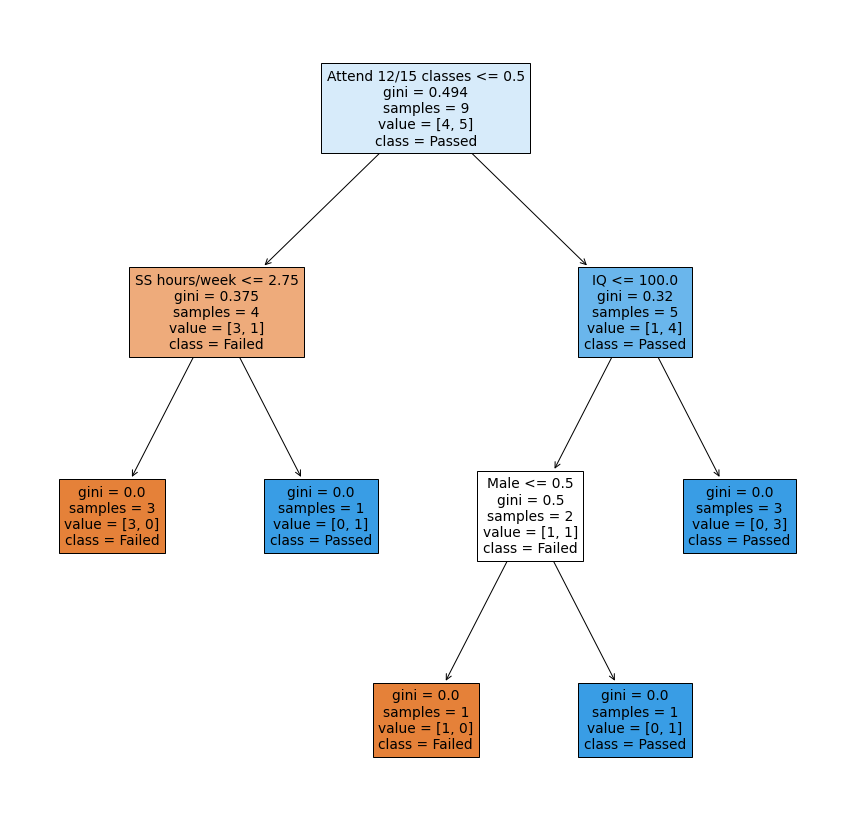

In [9]:
dtc = DecisionTreeClassifier(criterion='gini')
model = dtc.fit(X, y)
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model,
                   feature_names=df.columns,
                   class_names=['Failed', 'Passed'],
                   filled=True)

**References**

[1] Han, J., Pei, J., & Kamber, M. (2011). Data mining: concepts and techniques. Elsevier.

[2] `Sklearn`'s Decision Trees: https://scikit-learn.org/stable/modules/tree.html

[3] Decision Tree classification in Python: https://www.datacamp.com/community/tutorials/decision-tree-classification-python